# An Analysis of Passenger Numbers at Newark Liberty Airport

The US Customs and Border Protection Service (CBP) is a key part of the Department of Homeland Security and is responsible for processing passengers arriving on international flights. Its mission is to allow citizens and non-citizens into the country as efficiently as possible, reducing wait times at the border, while providing a layer of security. 

The CBP provides information through its website (awt.cbp.gov) on the wait times for US and non-US citizens for all US international airports. Moreover, the data provides an insight into the total number of passengers and arriving international flights on an hour by hour basis. Given the COVID-19 pandemic has greatly affected the New Jersey and New York City area, this data can be used to assess the effect of COVID-19 on passenger and flight numbers. The passenger numbers may be further affected by Trump's 11th March Executive Order, which restricted flights arriving from the EU. 

In this challenge, we will consider the data from Newark Liberty International airport (EWR) to answer several questions: 
 1. How have the passenger numbers been affected by the COVID-19 pandemic? 
 2. Can a prediction be made as to when the passenger numbers will recover to mean 2019 levels? 

The answers to these questions are included this Jupyter notebook.

During the fellowship, this exercise would be extended to compare the performance of EWR to other airports in the surrounding New York- Boston – Philadelphia area, to determine whether passenger numbers at certain airports are recovering faster than others. Additionally, this analysis could be completed across the entire country. Flights arriving into West Coast, central USA and Florida/Georgia airports may be affected differently, as they may have different regions of origin (i.e. Asia-Pacific, South America, etc) and varying COVID-19 infection levels. Several Data Science techniques could be used to improve the predictions, and provide confidence intervals for when passenger levels are expected to return to their pre-COVID-19 levels. These would include Machine Learning to improve the overall prediction, and producing confidence intervals in the predictions using bootstrapping or similar.

Finally, the datasets the CBP provides wait time based on time of day, the volume of passengers, the number of arriving flights and the citizenship of the passengers it processes. This data, coupled to secondary sources such as opensource flight tracking information and passenger load factors obtained through airline websites or seatguru.com could allow for predictions to be made about the expected wait time on arrival, and how many processing booths may be needed to reduce the wait time to an acceptable level.

In [1]:
#Import necessary toolboxes
import os
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
#Format matplotlib to plot figures in line
%matplotlib inline

Import the data from an excel formatted file, downloaded from the CBP website (awt.cbp.gov). The files are stored in a static address on my PC, but can be downloaded from the website. I would either like to scrape this from the webpage or automate the download and conversion process to improve the workflow.

In [3]:
filenames = os.listdir('Challenge1Data')
df = []

for i in range(len(filenames)):
    filename_curr = 'Challenge1Data/' + filenames[i]
    print('Loading...', filename_curr)
    data = pd.read_excel(filename_curr, header = 3, parse_dates = False)
    df.append(data)
df = pd.concat(df)    
#Sort out column names, times and datatypes before EDA
#Regex statement for time at start of hour, use this for hour by hour binning later on
StartStr = '(\d{4})'
df.columns = ['Airport', 'Terminal', 'Date', 'Interval', 'US-Avg-Wait', 'US-Max-Wait', 'Non-US-Avg-Wait', 'Non-US-Max-Wait', 'Avg-Wait', 'Max-Wait', 'Pax-0-15', 'Pax-16-30', 'Pax-31-45', 'Pax-46-60', 'Pax-61-90', 'Pax-91-120', 'Pax-120+', 'Excluded', 'Total', 'Flights', 'Booths']
df['StartTime'] = df['Interval'].str.extract(StartStr).astype('int')/100  

Loading... Challenge1Data/EWR_2012.xlsx
Loading... Challenge1Data/EWR_2013.xlsx
Loading... Challenge1Data/EWR_2014.xlsx
Loading... Challenge1Data/EWR_2015.xlsx
Loading... Challenge1Data/EWR_2016.xlsx
Loading... Challenge1Data/EWR_2017.xlsx
Loading... Challenge1Data/EWR_2018.xlsx
Loading... Challenge1Data/EWR_2019.xlsx
Loading... Challenge1Data/EWR_2020.xlsx


In [5]:
#Set up full date string, this takes a little while to process. There should be a quicker and easier way of processing this
for i2 in range(len(df)):
    print("Percent Complete: %3.2f " % (i2/len(df)*100))
    df['Date'].iloc[i2] = df['Date'].iloc[i2] + timedelta(hours=df['StartTime'].iloc[i2])

Percent Complete: 0.00 
Percent Complete: 0.00 
Percent Complete: 0.00 
Percent Complete: 0.00 
Percent Complete: 0.00 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.01 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.02 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.03 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete: 0.04 
Percent Complete

Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.47 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.48 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.49 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.50 
Percent Complete: 0.51 
Percent Complete: 0.51 
Percent Complete: 0.51 
Percent Complete: 0.51 
Percent Complete: 0.51 
Percent Complete

Percent Complete: 1.03 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.04 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.05 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.06 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.07 
Percent Complete: 1.08 
Percent Complete: 1.08 
Percent Complete: 1.08 
Percent Complete: 1.08 
Percent Complete

Percent Complete: 1.62 
Percent Complete: 1.62 
Percent Complete: 1.62 
Percent Complete: 1.62 
Percent Complete: 1.62 
Percent Complete: 1.62 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.63 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.64 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.65 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete: 1.66 
Percent Complete

Percent Complete: 2.22 
Percent Complete: 2.22 
Percent Complete: 2.22 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.23 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.24 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.25 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.26 
Percent Complete: 2.27 
Percent Complete: 2.27 
Percent Complete: 2.27 
Percent Complete

Percent Complete: 2.84 
Percent Complete: 2.84 
Percent Complete: 2.84 
Percent Complete: 2.84 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.85 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.86 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.87 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.88 
Percent Complete: 2.89 
Percent Complete

Percent Complete: 3.46 
Percent Complete: 3.46 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.47 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.48 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.49 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.50 
Percent Complete: 3.51 
Percent Complete: 3.51 
Percent Complete: 3.51 
Percent Complete

Percent Complete: 4.10 
Percent Complete: 4.10 
Percent Complete: 4.10 
Percent Complete: 4.10 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.11 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.12 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.13 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.14 
Percent Complete: 4.15 
Percent Complete

Percent Complete: 4.72 
Percent Complete: 4.72 
Percent Complete: 4.72 
Percent Complete: 4.72 
Percent Complete: 4.72 
Percent Complete: 4.72 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.73 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.74 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.75 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete: 4.76 
Percent Complete

Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.35 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.36 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.37 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.38 
Percent Complete: 5.39 
Percent Complete: 5.39 
Percent Complete: 5.39 
Percent Complete: 5.39 
Percent Complete: 5.39 
Percent Complete

Percent Complete: 5.94 
Percent Complete: 5.94 
Percent Complete: 5.94 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.95 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.96 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.97 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.98 
Percent Complete: 5.99 
Percent Complete: 5.99 
Percent Complete

Percent Complete: 6.57 
Percent Complete: 6.57 
Percent Complete: 6.57 
Percent Complete: 6.57 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.58 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.59 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.60 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.61 
Percent Complete: 6.62 
Percent Complete

Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.15 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.16 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.17 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.18 
Percent Complete: 7.19 
Percent Complete: 7.19 
Percent Complete: 7.19 
Percent Complete: 7.19 
Percent Complete: 7.19 
Percent Complete

Percent Complete: 7.77 
Percent Complete: 7.77 
Percent Complete: 7.77 
Percent Complete: 7.77 
Percent Complete: 7.77 
Percent Complete: 7.77 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.78 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.79 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.80 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete: 7.81 
Percent Complete

Percent Complete: 8.38 
Percent Complete: 8.38 
Percent Complete: 8.38 
Percent Complete: 8.38 
Percent Complete: 8.38 
Percent Complete: 8.38 
Percent Complete: 8.38 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.39 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.40 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.41 
Percent Complete: 8.42 
Percent Complete: 8.42 
Percent Complete: 8.42 
Percent Complete: 8.42 
Percent Complete: 8.42 
Percent Complete: 8.42 
Percent Complete: 8.42 
Percent Complete

Percent Complete: 9.01 
Percent Complete: 9.01 
Percent Complete: 9.01 
Percent Complete: 9.01 
Percent Complete: 9.01 
Percent Complete: 9.01 
Percent Complete: 9.01 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.02 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.03 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.04 
Percent Complete: 9.05 
Percent Complete: 9.05 
Percent Complete: 9.05 
Percent Complete: 9.05 
Percent Complete: 9.05 
Percent Complete: 9.05 
Percent Complete: 9.05 
Percent Complete

Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.64 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.65 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.66 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.67 
Percent Complete: 9.68 
Percent Complete: 9.68 
Percent Complete: 9.68 
Percent Complete: 9.68 
Percent Complete: 9.68 
Percent Complete

Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.25 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.26 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.27 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.28 
Percent Complete: 10.29 
Percent Complete: 10.29 
Percent Complete: 10.29 
Percent Complete: 10.29 
Percent Complete: 10.29 
Percent Complete: 10.29 


Percent Complete: 10.86 
Percent Complete: 10.86 
Percent Complete: 10.86 
Percent Complete: 10.86 
Percent Complete: 10.86 
Percent Complete: 10.86 
Percent Complete: 10.86 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.87 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.88 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.89 
Percent Complete: 10.90 
Percent Complete: 10.90 
Percent Complete: 10.90 
Percent Complete: 10.90 
Percent Complete: 10.90 
Percent Complete: 10.90 


Percent Complete: 11.39 
Percent Complete: 11.39 
Percent Complete: 11.39 
Percent Complete: 11.39 
Percent Complete: 11.39 
Percent Complete: 11.39 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.40 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.41 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.42 
Percent Complete: 11.43 
Percent Complete: 11.43 
Percent Complete: 11.43 
Percent Complete: 11.43 
Percent Complete: 11.43 
Percent Complete: 11.43 
Percent Complete: 11.43 


Percent Complete: 11.76 
Percent Complete: 11.76 
Percent Complete: 11.76 
Percent Complete: 11.76 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.77 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.78 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.79 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 
Percent Complete: 11.80 


Percent Complete: 12.14 
Percent Complete: 12.14 
Percent Complete: 12.14 
Percent Complete: 12.14 
Percent Complete: 12.14 
Percent Complete: 12.14 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.15 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.16 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.17 
Percent Complete: 12.18 
Percent Complete: 12.18 
Percent Complete: 12.18 
Percent Complete: 12.18 
Percent Complete: 12.18 
Percent Complete: 12.18 
Percent Complete: 12.18 


Percent Complete: 12.61 
Percent Complete: 12.61 
Percent Complete: 12.61 
Percent Complete: 12.61 
Percent Complete: 12.61 
Percent Complete: 12.61 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.62 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.63 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.64 
Percent Complete: 12.65 
Percent Complete: 12.65 
Percent Complete: 12.65 
Percent Complete: 12.65 
Percent Complete: 12.65 
Percent Complete: 12.65 
Percent Complete: 12.65 


Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.98 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 12.99 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.00 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.01 
Percent Complete: 13.02 
Percent Complete: 13.02 
Percent Complete: 13.02 
Percent Complete: 13.02 
Percent Complete: 13.02 


Percent Complete: 13.42 
Percent Complete: 13.42 
Percent Complete: 13.42 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.43 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.44 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.45 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.46 
Percent Complete: 13.47 


Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.95 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.96 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.97 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.98 
Percent Complete: 13.99 
Percent Complete: 13.99 
Percent Complete: 13.99 
Percent Complete: 13.99 


Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.45 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.46 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.47 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.48 
Percent Complete: 14.49 
Percent Complete: 14.49 
Percent Complete: 14.49 
Percent Complete: 14.49 
Percent Complete: 14.49 
Percent Complete: 14.49 


Percent Complete: 14.86 
Percent Complete: 14.86 
Percent Complete: 14.86 
Percent Complete: 14.86 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.87 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.88 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.89 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 
Percent Complete: 14.90 


Percent Complete: 15.43 
Percent Complete: 15.43 
Percent Complete: 15.43 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.44 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.45 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.46 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.47 
Percent Complete: 15.48 


Percent Complete: 16.00 
Percent Complete: 16.00 
Percent Complete: 16.00 
Percent Complete: 16.00 
Percent Complete: 16.00 
Percent Complete: 16.00 
Percent Complete: 16.00 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.01 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.02 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.03 
Percent Complete: 16.04 
Percent Complete: 16.04 
Percent Complete: 16.04 
Percent Complete: 16.04 
Percent Complete: 16.04 
Percent Complete: 16.04 


Percent Complete: 16.62 
Percent Complete: 16.62 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.63 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.64 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.65 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.66 
Percent Complete: 16.67 
Percent Complete: 16.67 


Percent Complete: 17.25 
Percent Complete: 17.25 
Percent Complete: 17.25 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.26 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.27 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.28 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.29 
Percent Complete: 17.30 


Percent Complete: 17.85 
Percent Complete: 17.85 
Percent Complete: 17.85 
Percent Complete: 17.85 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.86 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.87 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.88 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 
Percent Complete: 17.89 


Percent Complete: 18.48 
Percent Complete: 18.48 
Percent Complete: 18.48 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.49 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.50 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.51 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.52 
Percent Complete: 18.53 


Percent Complete: 19.10 
Percent Complete: 19.10 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.11 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.12 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.13 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.14 
Percent Complete: 19.15 
Percent Complete: 19.15 


Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.71 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.72 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.73 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.74 
Percent Complete: 19.75 
Percent Complete: 19.75 
Percent Complete: 19.75 
Percent Complete: 19.75 
Percent Complete: 19.75 


Percent Complete: 20.31 
Percent Complete: 20.31 
Percent Complete: 20.31 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.32 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.33 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.34 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.35 
Percent Complete: 20.36 


Percent Complete: 20.90 
Percent Complete: 20.90 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.91 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.92 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.93 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.94 
Percent Complete: 20.95 
Percent Complete: 20.95 


Percent Complete: 21.43 
Percent Complete: 21.43 
Percent Complete: 21.43 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.44 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.45 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.46 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.47 
Percent Complete: 21.48 


Percent Complete: 21.97 
Percent Complete: 21.97 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.98 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 21.99 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.00 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.01 
Percent Complete: 22.02 
Percent Complete: 22.02 


Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.50 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.51 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.52 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.53 
Percent Complete: 22.54 
Percent Complete: 22.54 
Percent Complete: 22.54 
Percent Complete: 22.54 


Percent Complete: 23.09 
Percent Complete: 23.09 
Percent Complete: 23.09 
Percent Complete: 23.09 
Percent Complete: 23.09 
Percent Complete: 23.09 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.10 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.11 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.12 
Percent Complete: 23.13 
Percent Complete: 23.13 
Percent Complete: 23.13 
Percent Complete: 23.13 
Percent Complete: 23.13 
Percent Complete: 23.13 
Percent Complete: 23.13 


Percent Complete: 23.63 
Percent Complete: 23.63 
Percent Complete: 23.63 
Percent Complete: 23.63 
Percent Complete: 23.63 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.64 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.65 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.66 
Percent Complete: 23.67 
Percent Complete: 23.67 
Percent Complete: 23.67 
Percent Complete: 23.67 
Percent Complete: 23.67 
Percent Complete: 23.67 
Percent Complete: 23.67 
Percent Complete: 23.67 


Percent Complete: 24.20 
Percent Complete: 24.20 
Percent Complete: 24.20 
Percent Complete: 24.20 
Percent Complete: 24.20 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.21 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.22 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.23 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 
Percent Complete: 24.24 


Percent Complete: 24.78 
Percent Complete: 24.78 
Percent Complete: 24.78 
Percent Complete: 24.78 
Percent Complete: 24.78 
Percent Complete: 24.78 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.79 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.80 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.81 
Percent Complete: 24.82 
Percent Complete: 24.82 
Percent Complete: 24.82 
Percent Complete: 24.82 
Percent Complete: 24.82 
Percent Complete: 24.82 
Percent Complete: 24.82 


Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.33 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.34 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.35 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.36 
Percent Complete: 25.37 
Percent Complete: 25.37 
Percent Complete: 25.37 
Percent Complete: 25.37 
Percent Complete: 25.37 


Percent Complete: 25.91 
Percent Complete: 25.91 
Percent Complete: 25.91 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.92 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.93 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.94 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.95 
Percent Complete: 25.96 


Percent Complete: 26.51 
Percent Complete: 26.51 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.52 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.53 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.54 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.55 
Percent Complete: 26.56 
Percent Complete: 26.56 


Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.93 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.94 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.95 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.96 
Percent Complete: 26.97 
Percent Complete: 26.97 
Percent Complete: 26.97 
Percent Complete: 26.97 


Percent Complete: 27.45 
Percent Complete: 27.45 
Percent Complete: 27.45 
Percent Complete: 27.45 
Percent Complete: 27.45 
Percent Complete: 27.45 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.46 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.47 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.48 
Percent Complete: 27.49 
Percent Complete: 27.49 
Percent Complete: 27.49 
Percent Complete: 27.49 
Percent Complete: 27.49 
Percent Complete: 27.49 
Percent Complete: 27.49 


Percent Complete: 27.96 
Percent Complete: 27.96 
Percent Complete: 27.96 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.97 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.98 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 27.99 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.00 
Percent Complete: 28.01 


Percent Complete: 28.46 
Percent Complete: 28.46 
Percent Complete: 28.46 
Percent Complete: 28.46 
Percent Complete: 28.46 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.47 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.48 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.49 
Percent Complete: 28.50 
Percent Complete: 28.50 
Percent Complete: 28.50 
Percent Complete: 28.50 
Percent Complete: 28.50 
Percent Complete: 28.50 
Percent Complete: 28.50 
Percent Complete: 28.50 


Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.87 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.88 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.89 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.90 
Percent Complete: 28.91 
Percent Complete: 28.91 
Percent Complete: 28.91 
Percent Complete: 28.91 


Percent Complete: 29.34 
Percent Complete: 29.34 
Percent Complete: 29.34 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.35 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.36 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.37 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.38 
Percent Complete: 29.39 


Percent Complete: 29.80 
Percent Complete: 29.80 
Percent Complete: 29.80 
Percent Complete: 29.80 
Percent Complete: 29.80 
Percent Complete: 29.80 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.81 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.82 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.83 
Percent Complete: 29.84 
Percent Complete: 29.84 
Percent Complete: 29.84 
Percent Complete: 29.84 
Percent Complete: 29.84 
Percent Complete: 29.84 
Percent Complete: 29.84 


Percent Complete: 30.21 
Percent Complete: 30.21 
Percent Complete: 30.21 
Percent Complete: 30.21 
Percent Complete: 30.21 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.22 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.23 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.24 
Percent Complete: 30.25 
Percent Complete: 30.25 
Percent Complete: 30.25 
Percent Complete: 30.25 
Percent Complete: 30.25 
Percent Complete: 30.25 
Percent Complete: 30.25 
Percent Complete: 30.25 


Percent Complete: 30.58 
Percent Complete: 30.58 
Percent Complete: 30.58 
Percent Complete: 30.58 
Percent Complete: 30.58 
Percent Complete: 30.58 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.59 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.60 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.61 
Percent Complete: 30.62 
Percent Complete: 30.62 
Percent Complete: 30.62 
Percent Complete: 30.62 
Percent Complete: 30.62 
Percent Complete: 30.62 
Percent Complete: 30.62 


Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 30.99 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.00 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.01 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.02 
Percent Complete: 31.03 
Percent Complete: 31.03 
Percent Complete: 31.03 
Percent Complete: 31.03 


Percent Complete: 31.41 
Percent Complete: 31.41 
Percent Complete: 31.41 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.42 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.43 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.44 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.45 
Percent Complete: 31.46 


Percent Complete: 31.86 
Percent Complete: 31.86 
Percent Complete: 31.86 
Percent Complete: 31.86 
Percent Complete: 31.86 
Percent Complete: 31.86 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.87 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.88 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.89 
Percent Complete: 31.90 
Percent Complete: 31.90 
Percent Complete: 31.90 
Percent Complete: 31.90 
Percent Complete: 31.90 
Percent Complete: 31.90 
Percent Complete: 31.90 
Percent Complete: 31.90 


Percent Complete: 32.30 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.31 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.32 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.33 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.34 
Percent Complete: 32.35 
Percent Complete: 32.35 
Percent Complete: 32.35 


Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.73 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.74 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.75 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.76 
Percent Complete: 32.77 
Percent Complete: 32.77 
Percent Complete: 32.77 
Percent Complete: 32.77 


Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.33 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.34 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.35 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.36 
Percent Complete: 33.37 
Percent Complete: 33.37 
Percent Complete: 33.37 
Percent Complete: 33.37 
Percent Complete: 33.37 


Percent Complete: 33.80 
Percent Complete: 33.80 
Percent Complete: 33.80 
Percent Complete: 33.80 
Percent Complete: 33.80 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.81 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.82 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.83 
Percent Complete: 33.84 
Percent Complete: 33.84 
Percent Complete: 33.84 
Percent Complete: 33.84 
Percent Complete: 33.84 
Percent Complete: 33.84 
Percent Complete: 33.84 
Percent Complete: 33.84 


Percent Complete: 34.30 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.31 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.32 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.33 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.34 
Percent Complete: 34.35 
Percent Complete: 34.35 
Percent Complete: 34.35 
Percent Complete: 34.35 


Percent Complete: 34.86 
Percent Complete: 34.86 
Percent Complete: 34.86 
Percent Complete: 34.86 
Percent Complete: 34.86 
Percent Complete: 34.86 
Percent Complete: 34.86 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.87 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.88 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.89 
Percent Complete: 34.90 
Percent Complete: 34.90 
Percent Complete: 34.90 
Percent Complete: 34.90 
Percent Complete: 34.90 
Percent Complete: 34.90 


Percent Complete: 35.38 
Percent Complete: 35.38 
Percent Complete: 35.38 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.39 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.40 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.41 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.42 
Percent Complete: 35.43 


Percent Complete: 35.92 
Percent Complete: 35.92 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.93 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.94 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.95 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.96 
Percent Complete: 35.97 
Percent Complete: 35.97 


Percent Complete: 36.42 
Percent Complete: 36.42 
Percent Complete: 36.42 
Percent Complete: 36.42 
Percent Complete: 36.42 
Percent Complete: 36.42 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.43 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.44 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.45 
Percent Complete: 36.46 
Percent Complete: 36.46 
Percent Complete: 36.46 
Percent Complete: 36.46 
Percent Complete: 36.46 
Percent Complete: 36.46 
Percent Complete: 36.46 


Percent Complete: 36.93 
Percent Complete: 36.93 
Percent Complete: 36.93 
Percent Complete: 36.93 
Percent Complete: 36.93 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.94 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.95 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.96 
Percent Complete: 36.97 
Percent Complete: 36.97 
Percent Complete: 36.97 
Percent Complete: 36.97 
Percent Complete: 36.97 
Percent Complete: 36.97 
Percent Complete: 36.97 
Percent Complete: 36.97 


Percent Complete: 37.46 
Percent Complete: 37.46 
Percent Complete: 37.46 
Percent Complete: 37.46 
Percent Complete: 37.46 
Percent Complete: 37.46 
Percent Complete: 37.46 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.47 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.48 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.49 
Percent Complete: 37.50 
Percent Complete: 37.50 
Percent Complete: 37.50 
Percent Complete: 37.50 
Percent Complete: 37.50 
Percent Complete: 37.50 


Percent Complete: 38.00 
Percent Complete: 38.00 
Percent Complete: 38.00 
Percent Complete: 38.00 
Percent Complete: 38.00 
Percent Complete: 38.00 
Percent Complete: 38.00 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.01 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.02 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.03 
Percent Complete: 38.04 
Percent Complete: 38.04 
Percent Complete: 38.04 
Percent Complete: 38.04 
Percent Complete: 38.04 
Percent Complete: 38.04 


Percent Complete: 38.53 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.54 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.55 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.56 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.57 
Percent Complete: 38.58 
Percent Complete: 38.58 
Percent Complete: 38.58 


Percent Complete: 39.03 
Percent Complete: 39.03 
Percent Complete: 39.03 
Percent Complete: 39.03 
Percent Complete: 39.03 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.04 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.05 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.06 
Percent Complete: 39.07 
Percent Complete: 39.07 
Percent Complete: 39.07 
Percent Complete: 39.07 
Percent Complete: 39.07 
Percent Complete: 39.07 
Percent Complete: 39.07 
Percent Complete: 39.07 


Percent Complete: 39.56 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.57 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.58 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.59 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.60 
Percent Complete: 39.61 
Percent Complete: 39.61 
Percent Complete: 39.61 


Percent Complete: 40.12 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.13 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.14 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.15 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.16 
Percent Complete: 40.17 
Percent Complete: 40.17 
Percent Complete: 40.17 


Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.63 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.64 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.65 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.66 
Percent Complete: 40.67 
Percent Complete: 40.67 
Percent Complete: 40.67 
Percent Complete: 40.67 


Percent Complete: 41.18 
Percent Complete: 41.18 
Percent Complete: 41.18 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.19 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.20 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.21 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.22 
Percent Complete: 41.23 


Percent Complete: 41.73 
Percent Complete: 41.73 
Percent Complete: 41.73 
Percent Complete: 41.73 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.74 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.75 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.76 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 
Percent Complete: 41.77 


Percent Complete: 42.25 
Percent Complete: 42.25 
Percent Complete: 42.25 
Percent Complete: 42.25 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.26 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.27 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.28 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 
Percent Complete: 42.29 


Percent Complete: 42.82 
Percent Complete: 42.82 
Percent Complete: 42.82 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.83 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.84 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.85 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.86 
Percent Complete: 42.87 


Percent Complete: 43.33 
Percent Complete: 43.33 
Percent Complete: 43.33 
Percent Complete: 43.33 
Percent Complete: 43.33 
Percent Complete: 43.33 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.34 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.35 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.36 
Percent Complete: 43.37 
Percent Complete: 43.37 
Percent Complete: 43.37 
Percent Complete: 43.37 
Percent Complete: 43.37 
Percent Complete: 43.37 
Percent Complete: 43.37 


Percent Complete: 43.89 
Percent Complete: 43.89 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.90 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.91 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.92 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.93 
Percent Complete: 43.94 
Percent Complete: 43.94 


Percent Complete: 44.42 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.43 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.44 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.45 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.46 
Percent Complete: 44.47 
Percent Complete: 44.47 
Percent Complete: 44.47 
Percent Complete: 44.47 


Percent Complete: 44.96 
Percent Complete: 44.96 
Percent Complete: 44.96 
Percent Complete: 44.96 
Percent Complete: 44.96 
Percent Complete: 44.96 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.97 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.98 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 44.99 
Percent Complete: 45.00 
Percent Complete: 45.00 
Percent Complete: 45.00 
Percent Complete: 45.00 
Percent Complete: 45.00 
Percent Complete: 45.00 
Percent Complete: 45.00 


Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.48 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.49 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.50 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.51 
Percent Complete: 45.52 
Percent Complete: 45.52 
Percent Complete: 45.52 
Percent Complete: 45.52 
Percent Complete: 45.52 


Percent Complete: 46.00 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.01 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.02 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.03 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.04 
Percent Complete: 46.05 
Percent Complete: 46.05 
Percent Complete: 46.05 


Percent Complete: 46.53 
Percent Complete: 46.53 
Percent Complete: 46.53 
Percent Complete: 46.53 
Percent Complete: 46.53 
Percent Complete: 46.53 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.54 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.55 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.56 
Percent Complete: 46.57 
Percent Complete: 46.57 
Percent Complete: 46.57 
Percent Complete: 46.57 
Percent Complete: 46.57 
Percent Complete: 46.57 
Percent Complete: 46.57 


Percent Complete: 47.08 
Percent Complete: 47.08 
Percent Complete: 47.08 
Percent Complete: 47.08 
Percent Complete: 47.08 
Percent Complete: 47.08 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.09 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.10 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.11 
Percent Complete: 47.12 
Percent Complete: 47.12 
Percent Complete: 47.12 
Percent Complete: 47.12 
Percent Complete: 47.12 
Percent Complete: 47.12 
Percent Complete: 47.12 


Percent Complete: 47.62 
Percent Complete: 47.62 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.63 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.64 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.65 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.66 
Percent Complete: 47.67 
Percent Complete: 47.67 


Percent Complete: 48.17 
Percent Complete: 48.17 
Percent Complete: 48.17 
Percent Complete: 48.17 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.18 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.19 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.20 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 
Percent Complete: 48.21 


Percent Complete: 48.71 
Percent Complete: 48.71 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.72 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.73 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.74 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.75 
Percent Complete: 48.76 
Percent Complete: 48.76 


Percent Complete: 49.22 
Percent Complete: 49.22 
Percent Complete: 49.22 
Percent Complete: 49.22 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.23 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.24 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.25 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 
Percent Complete: 49.26 


Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.76 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.77 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.78 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.79 
Percent Complete: 49.80 
Percent Complete: 49.80 
Percent Complete: 49.80 
Percent Complete: 49.80 


Percent Complete: 50.21 
Percent Complete: 50.21 
Percent Complete: 50.21 
Percent Complete: 50.21 
Percent Complete: 50.21 
Percent Complete: 50.21 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.22 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.23 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.24 
Percent Complete: 50.25 
Percent Complete: 50.25 
Percent Complete: 50.25 
Percent Complete: 50.25 
Percent Complete: 50.25 
Percent Complete: 50.25 
Percent Complete: 50.25 


Percent Complete: 50.69 
Percent Complete: 50.69 
Percent Complete: 50.69 
Percent Complete: 50.69 
Percent Complete: 50.69 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.70 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.71 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.72 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 
Percent Complete: 50.73 


Percent Complete: 51.19 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.20 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.21 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.22 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.23 
Percent Complete: 51.24 
Percent Complete: 51.24 
Percent Complete: 51.24 


Percent Complete: 51.65 
Percent Complete: 51.65 
Percent Complete: 51.65 
Percent Complete: 51.65 
Percent Complete: 51.65 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.66 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.67 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.68 
Percent Complete: 51.69 
Percent Complete: 51.69 
Percent Complete: 51.69 
Percent Complete: 51.69 
Percent Complete: 51.69 
Percent Complete: 51.69 
Percent Complete: 51.69 
Percent Complete: 51.69 


Percent Complete: 52.13 
Percent Complete: 52.13 
Percent Complete: 52.13 
Percent Complete: 52.13 
Percent Complete: 52.13 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.14 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.15 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.16 
Percent Complete: 52.17 
Percent Complete: 52.17 
Percent Complete: 52.17 
Percent Complete: 52.17 
Percent Complete: 52.17 
Percent Complete: 52.17 
Percent Complete: 52.17 
Percent Complete: 52.17 


Percent Complete: 52.61 
Percent Complete: 52.61 
Percent Complete: 52.61 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.62 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.63 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.64 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.65 
Percent Complete: 52.66 


Percent Complete: 53.01 
Percent Complete: 53.01 
Percent Complete: 53.01 
Percent Complete: 53.01 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.02 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.03 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.04 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 
Percent Complete: 53.05 


Percent Complete: 53.53 
Percent Complete: 53.53 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.54 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.55 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.56 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.57 
Percent Complete: 53.58 
Percent Complete: 53.58 


Percent Complete: 53.97 
Percent Complete: 53.97 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.98 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 53.99 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.00 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.01 
Percent Complete: 54.02 
Percent Complete: 54.02 


Percent Complete: 54.41 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.42 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.43 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.44 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.45 
Percent Complete: 54.46 
Percent Complete: 54.46 
Percent Complete: 54.46 


Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.93 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.94 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.95 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.96 
Percent Complete: 54.97 
Percent Complete: 54.97 
Percent Complete: 54.97 
Percent Complete: 54.97 


Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.46 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.47 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.48 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.49 
Percent Complete: 55.50 
Percent Complete: 55.50 
Percent Complete: 55.50 
Percent Complete: 55.50 
Percent Complete: 55.50 


Percent Complete: 55.88 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.89 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.90 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.91 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.92 
Percent Complete: 55.93 
Percent Complete: 55.93 
Percent Complete: 55.93 
Percent Complete: 55.93 


Percent Complete: 56.46 
Percent Complete: 56.46 
Percent Complete: 56.46 
Percent Complete: 56.46 
Percent Complete: 56.46 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.47 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.48 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.49 
Percent Complete: 56.50 
Percent Complete: 56.50 
Percent Complete: 56.50 
Percent Complete: 56.50 
Percent Complete: 56.50 
Percent Complete: 56.50 
Percent Complete: 56.50 
Percent Complete: 56.50 


Percent Complete: 56.99 
Percent Complete: 56.99 
Percent Complete: 56.99 
Percent Complete: 56.99 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.00 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.01 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.02 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 
Percent Complete: 57.03 


Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.57 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.58 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.59 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.60 
Percent Complete: 57.61 
Percent Complete: 57.61 
Percent Complete: 57.61 
Percent Complete: 57.61 
Percent Complete: 57.61 


Percent Complete: 58.14 
Percent Complete: 58.14 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.15 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.16 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.17 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.18 
Percent Complete: 58.19 
Percent Complete: 58.19 


Percent Complete: 58.72 
Percent Complete: 58.72 
Percent Complete: 58.72 
Percent Complete: 58.72 
Percent Complete: 58.72 
Percent Complete: 58.72 
Percent Complete: 58.72 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.73 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.74 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.75 
Percent Complete: 58.76 
Percent Complete: 58.76 
Percent Complete: 58.76 
Percent Complete: 58.76 
Percent Complete: 58.76 
Percent Complete: 58.76 


Percent Complete: 59.33 
Percent Complete: 59.33 
Percent Complete: 59.33 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.34 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.35 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.36 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.37 
Percent Complete: 59.38 


Percent Complete: 59.75 
Percent Complete: 59.75 
Percent Complete: 59.75 
Percent Complete: 59.75 
Percent Complete: 59.75 
Percent Complete: 59.75 
Percent Complete: 59.75 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.76 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.77 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.78 
Percent Complete: 59.79 
Percent Complete: 59.79 
Percent Complete: 59.79 
Percent Complete: 59.79 
Percent Complete: 59.79 
Percent Complete: 59.79 
Percent Complete: 59.79 


Percent Complete: 60.36 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.37 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.38 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.39 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.40 
Percent Complete: 60.41 
Percent Complete: 60.41 
Percent Complete: 60.41 


Percent Complete: 60.96 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.97 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.98 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 60.99 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.00 
Percent Complete: 61.01 
Percent Complete: 61.01 
Percent Complete: 61.01 


Percent Complete: 61.57 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.58 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.59 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.60 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.61 
Percent Complete: 61.62 
Percent Complete: 61.62 
Percent Complete: 61.62 


Percent Complete: 62.15 
Percent Complete: 62.15 
Percent Complete: 62.15 
Percent Complete: 62.15 
Percent Complete: 62.15 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.16 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.17 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.18 
Percent Complete: 62.19 
Percent Complete: 62.19 
Percent Complete: 62.19 
Percent Complete: 62.19 
Percent Complete: 62.19 
Percent Complete: 62.19 
Percent Complete: 62.19 
Percent Complete: 62.19 


Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.75 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.76 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.77 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.78 
Percent Complete: 62.79 
Percent Complete: 62.79 
Percent Complete: 62.79 
Percent Complete: 62.79 


Percent Complete: 63.33 
Percent Complete: 63.33 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.34 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.35 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.36 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.37 
Percent Complete: 63.38 
Percent Complete: 63.38 


Percent Complete: 63.88 
Percent Complete: 63.88 
Percent Complete: 63.88 
Percent Complete: 63.88 
Percent Complete: 63.88 
Percent Complete: 63.88 
Percent Complete: 63.88 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.89 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.90 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.91 
Percent Complete: 63.92 
Percent Complete: 63.92 
Percent Complete: 63.92 
Percent Complete: 63.92 
Percent Complete: 63.92 
Percent Complete: 63.92 


Percent Complete: 64.47 
Percent Complete: 64.47 
Percent Complete: 64.47 
Percent Complete: 64.47 
Percent Complete: 64.47 
Percent Complete: 64.47 
Percent Complete: 64.47 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.48 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.49 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.50 
Percent Complete: 64.51 
Percent Complete: 64.51 
Percent Complete: 64.51 
Percent Complete: 64.51 
Percent Complete: 64.51 
Percent Complete: 64.51 


Percent Complete: 65.02 
Percent Complete: 65.02 
Percent Complete: 65.02 
Percent Complete: 65.02 
Percent Complete: 65.02 
Percent Complete: 65.02 
Percent Complete: 65.02 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.03 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.04 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.05 
Percent Complete: 65.06 
Percent Complete: 65.06 
Percent Complete: 65.06 
Percent Complete: 65.06 
Percent Complete: 65.06 
Percent Complete: 65.06 


Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.61 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.62 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.63 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.64 
Percent Complete: 65.65 
Percent Complete: 65.65 
Percent Complete: 65.65 
Percent Complete: 65.65 


Percent Complete: 66.17 
Percent Complete: 66.17 
Percent Complete: 66.17 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.18 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.19 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.20 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.21 
Percent Complete: 66.22 


Percent Complete: 66.71 
Percent Complete: 66.71 
Percent Complete: 66.71 
Percent Complete: 66.71 
Percent Complete: 66.71 
Percent Complete: 66.71 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.72 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.73 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.74 
Percent Complete: 66.75 
Percent Complete: 66.75 
Percent Complete: 66.75 
Percent Complete: 66.75 
Percent Complete: 66.75 
Percent Complete: 66.75 
Percent Complete: 66.75 
Percent Complete: 66.75 


Percent Complete: 67.27 
Percent Complete: 67.27 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.28 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.29 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.30 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.31 
Percent Complete: 67.32 
Percent Complete: 67.32 


Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.79 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.80 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.81 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.82 
Percent Complete: 67.83 
Percent Complete: 67.83 
Percent Complete: 67.83 
Percent Complete: 67.83 
Percent Complete: 67.83 


Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.35 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.36 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.37 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.38 
Percent Complete: 68.39 
Percent Complete: 68.39 
Percent Complete: 68.39 
Percent Complete: 68.39 


Percent Complete: 68.90 
Percent Complete: 68.90 
Percent Complete: 68.90 
Percent Complete: 68.90 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.91 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.92 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.93 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 
Percent Complete: 68.94 


Percent Complete: 69.52 
Percent Complete: 69.52 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.53 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.54 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.55 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.56 
Percent Complete: 69.57 
Percent Complete: 69.57 


Percent Complete: 70.02 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.03 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.04 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.05 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.06 
Percent Complete: 70.07 
Percent Complete: 70.07 
Percent Complete: 70.07 


Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.64 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.65 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.66 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.67 
Percent Complete: 70.68 
Percent Complete: 70.68 
Percent Complete: 70.68 
Percent Complete: 70.68 


Percent Complete: 71.27 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.28 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.29 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.30 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.31 
Percent Complete: 71.32 
Percent Complete: 71.32 
Percent Complete: 71.32 


Percent Complete: 71.86 
Percent Complete: 71.86 
Percent Complete: 71.86 
Percent Complete: 71.86 
Percent Complete: 71.86 
Percent Complete: 71.86 
Percent Complete: 71.86 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.87 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.88 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.89 
Percent Complete: 71.90 
Percent Complete: 71.90 
Percent Complete: 71.90 
Percent Complete: 71.90 
Percent Complete: 71.90 
Percent Complete: 71.90 


Percent Complete: 72.47 
Percent Complete: 72.47 
Percent Complete: 72.47 
Percent Complete: 72.47 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.48 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.49 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.50 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 
Percent Complete: 72.51 


Percent Complete: 73.06 
Percent Complete: 73.06 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.07 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.08 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.09 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.10 
Percent Complete: 73.11 
Percent Complete: 73.11 


Percent Complete: 73.71 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.72 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.73 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.74 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.75 
Percent Complete: 73.76 
Percent Complete: 73.76 
Percent Complete: 73.76 


Percent Complete: 74.30 
Percent Complete: 74.30 
Percent Complete: 74.30 
Percent Complete: 74.30 
Percent Complete: 74.30 
Percent Complete: 74.30 
Percent Complete: 74.30 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.31 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.32 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.33 
Percent Complete: 74.34 
Percent Complete: 74.34 
Percent Complete: 74.34 
Percent Complete: 74.34 
Percent Complete: 74.34 
Percent Complete: 74.34 


Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.87 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.88 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.89 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.90 
Percent Complete: 74.91 
Percent Complete: 74.91 
Percent Complete: 74.91 
Percent Complete: 74.91 


Percent Complete: 75.27 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.28 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.29 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.30 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.31 
Percent Complete: 75.32 
Percent Complete: 75.32 
Percent Complete: 75.32 


Percent Complete: 75.83 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.84 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.85 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.86 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.87 
Percent Complete: 75.88 
Percent Complete: 75.88 
Percent Complete: 75.88 


Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.30 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.31 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.32 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.33 
Percent Complete: 76.34 
Percent Complete: 76.34 
Percent Complete: 76.34 
Percent Complete: 76.34 


Percent Complete: 76.67 
Percent Complete: 76.67 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.68 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.69 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.70 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.71 
Percent Complete: 76.72 
Percent Complete: 76.72 


Percent Complete: 77.32 
Percent Complete: 77.32 
Percent Complete: 77.32 
Percent Complete: 77.32 
Percent Complete: 77.32 
Percent Complete: 77.32 
Percent Complete: 77.32 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.33 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.34 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.35 
Percent Complete: 77.36 
Percent Complete: 77.36 
Percent Complete: 77.36 
Percent Complete: 77.36 
Percent Complete: 77.36 
Percent Complete: 77.36 


Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.89 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.90 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.91 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.92 
Percent Complete: 77.93 
Percent Complete: 77.93 
Percent Complete: 77.93 
Percent Complete: 77.93 


Percent Complete: 78.47 
Percent Complete: 78.47 
Percent Complete: 78.47 
Percent Complete: 78.47 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.48 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.49 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.50 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 
Percent Complete: 78.51 


Percent Complete: 79.06 
Percent Complete: 79.06 
Percent Complete: 79.06 
Percent Complete: 79.06 
Percent Complete: 79.06 
Percent Complete: 79.06 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.07 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.08 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.09 
Percent Complete: 79.10 
Percent Complete: 79.10 
Percent Complete: 79.10 
Percent Complete: 79.10 
Percent Complete: 79.10 
Percent Complete: 79.10 
Percent Complete: 79.10 


Percent Complete: 79.60 
Percent Complete: 79.60 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.61 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.62 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.63 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.64 
Percent Complete: 79.65 
Percent Complete: 79.65 
Percent Complete: 79.65 


Percent Complete: 80.21 
Percent Complete: 80.21 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.22 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.23 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.24 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.25 
Percent Complete: 80.26 
Percent Complete: 80.26 


Percent Complete: 80.68 
Percent Complete: 80.68 
Percent Complete: 80.68 
Percent Complete: 80.68 
Percent Complete: 80.68 
Percent Complete: 80.68 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.69 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.70 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.71 
Percent Complete: 80.72 
Percent Complete: 80.72 
Percent Complete: 80.72 
Percent Complete: 80.72 
Percent Complete: 80.72 
Percent Complete: 80.72 
Percent Complete: 80.72 


Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.19 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.20 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.21 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.22 
Percent Complete: 81.23 
Percent Complete: 81.23 
Percent Complete: 81.23 
Percent Complete: 81.23 


Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.72 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.73 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.74 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.75 
Percent Complete: 81.76 
Percent Complete: 81.76 
Percent Complete: 81.76 
Percent Complete: 81.76 


Percent Complete: 82.21 
Percent Complete: 82.21 
Percent Complete: 82.21 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.22 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.23 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.24 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.25 
Percent Complete: 82.26 


Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.74 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.75 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.76 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.77 
Percent Complete: 82.78 
Percent Complete: 82.78 
Percent Complete: 82.78 
Percent Complete: 82.78 
Percent Complete: 82.78 
Percent Complete: 82.78 


Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.31 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.32 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.33 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.34 
Percent Complete: 83.35 
Percent Complete: 83.35 
Percent Complete: 83.35 
Percent Complete: 83.35 


Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.72 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.73 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.74 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.75 
Percent Complete: 83.76 
Percent Complete: 83.76 
Percent Complete: 83.76 
Percent Complete: 83.76 


Percent Complete: 84.22 
Percent Complete: 84.22 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.23 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.24 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.25 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.26 
Percent Complete: 84.27 
Percent Complete: 84.27 


Percent Complete: 84.73 
Percent Complete: 84.73 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.74 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.75 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.76 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.77 
Percent Complete: 84.78 
Percent Complete: 84.78 


Percent Complete: 85.25 
Percent Complete: 85.25 
Percent Complete: 85.25 
Percent Complete: 85.25 
Percent Complete: 85.25 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.26 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.27 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.28 
Percent Complete: 85.29 
Percent Complete: 85.29 
Percent Complete: 85.29 
Percent Complete: 85.29 
Percent Complete: 85.29 
Percent Complete: 85.29 
Percent Complete: 85.29 
Percent Complete: 85.29 


Percent Complete: 85.74 
Percent Complete: 85.74 
Percent Complete: 85.74 
Percent Complete: 85.74 
Percent Complete: 85.74 
Percent Complete: 85.74 
Percent Complete: 85.74 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.75 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.76 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.77 
Percent Complete: 85.78 
Percent Complete: 85.78 
Percent Complete: 85.78 
Percent Complete: 85.78 
Percent Complete: 85.78 
Percent Complete: 85.78 


Percent Complete: 86.26 
Percent Complete: 86.26 
Percent Complete: 86.26 
Percent Complete: 86.26 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.27 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.28 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.29 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 
Percent Complete: 86.30 


Percent Complete: 86.74 
Percent Complete: 86.74 
Percent Complete: 86.74 
Percent Complete: 86.74 
Percent Complete: 86.74 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.75 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.76 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.77 
Percent Complete: 86.78 
Percent Complete: 86.78 
Percent Complete: 86.78 
Percent Complete: 86.78 
Percent Complete: 86.78 
Percent Complete: 86.78 
Percent Complete: 86.78 
Percent Complete: 86.78 


Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.20 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.21 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.22 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.23 
Percent Complete: 87.24 
Percent Complete: 87.24 
Percent Complete: 87.24 
Percent Complete: 87.24 


Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.68 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.69 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.70 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.71 
Percent Complete: 87.72 
Percent Complete: 87.72 
Percent Complete: 87.72 
Percent Complete: 87.72 
Percent Complete: 87.72 


Percent Complete: 88.12 
Percent Complete: 88.12 
Percent Complete: 88.12 
Percent Complete: 88.12 
Percent Complete: 88.12 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.13 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.14 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.15 
Percent Complete: 88.16 
Percent Complete: 88.16 
Percent Complete: 88.16 
Percent Complete: 88.16 
Percent Complete: 88.16 
Percent Complete: 88.16 
Percent Complete: 88.16 
Percent Complete: 88.16 


Percent Complete: 88.57 
Percent Complete: 88.57 
Percent Complete: 88.57 
Percent Complete: 88.57 
Percent Complete: 88.57 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.58 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.59 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.60 
Percent Complete: 88.61 
Percent Complete: 88.61 
Percent Complete: 88.61 
Percent Complete: 88.61 
Percent Complete: 88.61 
Percent Complete: 88.61 
Percent Complete: 88.61 
Percent Complete: 88.61 


Percent Complete: 89.05 
Percent Complete: 89.05 
Percent Complete: 89.05 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.06 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.07 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.08 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.09 
Percent Complete: 89.10 


Percent Complete: 89.48 
Percent Complete: 89.48 
Percent Complete: 89.48 
Percent Complete: 89.48 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.49 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.50 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.51 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 
Percent Complete: 89.52 


Percent Complete: 89.97 
Percent Complete: 89.97 
Percent Complete: 89.97 
Percent Complete: 89.97 
Percent Complete: 89.97 
Percent Complete: 89.97 
Percent Complete: 89.97 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.98 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 89.99 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.00 
Percent Complete: 90.01 
Percent Complete: 90.01 
Percent Complete: 90.01 
Percent Complete: 90.01 
Percent Complete: 90.01 
Percent Complete: 90.01 


Percent Complete: 90.45 
Percent Complete: 90.45 
Percent Complete: 90.45 
Percent Complete: 90.45 
Percent Complete: 90.45 
Percent Complete: 90.45 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.46 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.47 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.48 
Percent Complete: 90.49 
Percent Complete: 90.49 
Percent Complete: 90.49 
Percent Complete: 90.49 
Percent Complete: 90.49 
Percent Complete: 90.49 
Percent Complete: 90.49 


Percent Complete: 90.94 
Percent Complete: 90.94 
Percent Complete: 90.94 
Percent Complete: 90.94 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.95 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.96 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.97 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 
Percent Complete: 90.98 


Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.42 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.43 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.44 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.45 
Percent Complete: 91.46 
Percent Complete: 91.46 
Percent Complete: 91.46 
Percent Complete: 91.46 


Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.88 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.89 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.90 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.91 
Percent Complete: 91.92 
Percent Complete: 91.92 
Percent Complete: 91.92 
Percent Complete: 91.92 


Percent Complete: 92.32 
Percent Complete: 92.32 
Percent Complete: 92.32 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.33 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.34 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.35 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.36 
Percent Complete: 92.37 


Percent Complete: 92.76 
Percent Complete: 92.76 
Percent Complete: 92.76 
Percent Complete: 92.76 
Percent Complete: 92.76 
Percent Complete: 92.76 
Percent Complete: 92.76 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.77 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.78 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.79 
Percent Complete: 92.80 
Percent Complete: 92.80 
Percent Complete: 92.80 
Percent Complete: 92.80 
Percent Complete: 92.80 
Percent Complete: 92.80 


Percent Complete: 93.21 
Percent Complete: 93.21 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.22 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.23 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.24 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.25 
Percent Complete: 93.26 
Percent Complete: 93.26 


Percent Complete: 93.66 
Percent Complete: 93.66 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.67 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.68 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.69 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.70 
Percent Complete: 93.71 
Percent Complete: 93.71 


Percent Complete: 94.15 
Percent Complete: 94.15 
Percent Complete: 94.15 
Percent Complete: 94.15 
Percent Complete: 94.15 
Percent Complete: 94.15 
Percent Complete: 94.15 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.16 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.17 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.18 
Percent Complete: 94.19 
Percent Complete: 94.19 
Percent Complete: 94.19 
Percent Complete: 94.19 
Percent Complete: 94.19 
Percent Complete: 94.19 


Percent Complete: 94.70 
Percent Complete: 94.70 
Percent Complete: 94.70 
Percent Complete: 94.70 
Percent Complete: 94.70 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.71 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.72 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.73 
Percent Complete: 94.74 
Percent Complete: 94.74 
Percent Complete: 94.74 
Percent Complete: 94.74 
Percent Complete: 94.74 
Percent Complete: 94.74 
Percent Complete: 94.74 
Percent Complete: 94.74 


Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.10 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.11 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.12 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.13 
Percent Complete: 95.14 
Percent Complete: 95.14 
Percent Complete: 95.14 
Percent Complete: 95.14 


Percent Complete: 95.56 
Percent Complete: 95.56 
Percent Complete: 95.56 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.57 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.58 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.59 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.60 
Percent Complete: 95.61 


Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.93 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.94 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.95 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.96 
Percent Complete: 95.97 
Percent Complete: 95.97 
Percent Complete: 95.97 
Percent Complete: 95.97 
Percent Complete: 95.97 


Percent Complete: 96.35 
Percent Complete: 96.35 
Percent Complete: 96.35 
Percent Complete: 96.35 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.36 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.37 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.38 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 
Percent Complete: 96.39 


Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.76 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.77 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.78 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.79 
Percent Complete: 96.80 
Percent Complete: 96.80 
Percent Complete: 96.80 
Percent Complete: 96.80 


Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.24 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.25 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.26 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.27 
Percent Complete: 97.28 
Percent Complete: 97.28 
Percent Complete: 97.28 
Percent Complete: 97.28 
Percent Complete: 97.28 


Percent Complete: 97.74 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.75 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.76 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.77 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.78 
Percent Complete: 97.79 
Percent Complete: 97.79 
Percent Complete: 97.79 


Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.17 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.18 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.19 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.20 
Percent Complete: 98.21 
Percent Complete: 98.21 
Percent Complete: 98.21 
Percent Complete: 98.21 


Percent Complete: 98.66 
Percent Complete: 98.66 
Percent Complete: 98.66 
Percent Complete: 98.66 
Percent Complete: 98.66 
Percent Complete: 98.66 
Percent Complete: 98.66 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.67 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.68 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.69 
Percent Complete: 98.70 
Percent Complete: 98.70 
Percent Complete: 98.70 
Percent Complete: 98.70 
Percent Complete: 98.70 
Percent Complete: 98.70 


Percent Complete: 99.16 
Percent Complete: 99.16 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.17 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.18 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.19 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.20 
Percent Complete: 99.21 
Percent Complete: 99.21 


Percent Complete: 99.67 
Percent Complete: 99.67 
Percent Complete: 99.67 
Percent Complete: 99.67 
Percent Complete: 99.67 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.68 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.69 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.70 
Percent Complete: 99.71 
Percent Complete: 99.71 
Percent Complete: 99.71 
Percent Complete: 99.71 
Percent Complete: 99.71 
Percent Complete: 99.71 
Percent Complete: 99.71 
Percent Complete: 99.71 


In [8]:
# Calculate time spans to group by, Monthly mean figures will be the standard
df['Year']      = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Week']      = df['Date'].dt.week
df['Month']     = df['Date'].dt.month
df['Hour']      = df['Date'].dt.hour
df['DayOfYear']  = df['Date'].dt.dayofyear

# Calculation of additional variables, such as the number of passengers per flight, and the number of open CBP booths per flight
df['PaxPerFlight'] =    df['Total']/df['Flights']
df['BoothsPerFlight'] = df['Booths']/df['Flights']
df['PaxPerBooth'] = df['Total']/df['Flights']

In [9]:
# Group by day of year to get average per day and totals per day and sum
# then  group by Month to get total monthly and daily figures
#Calculate Sum 
Data_2020 = df[(df['Year']== 2020)].groupby(['DayOfYear']).sum()
Data_2019 = df[(df['Year']== 2019)].groupby(['DayOfYear']).sum()

In [10]:
#Define columns where mean, std make more sense than sum
listformean = ['Month',  'US-Avg-Wait', 'US-Max-Wait', 'Non-US-Avg-Wait', 'Non-US-Max-Wait', 'Avg-Wait', 'Max-Wait', 'PaxPerFlight', 'PaxPerBooth', 'BoothsPerFlight']

In [11]:
#Exclude month from the second set of averages, its now the index
listformean.append('Flights')
listformean2 = listformean[1:] 

In [12]:
def GenerateDates(df, year, month, day):
    """
    A function to produce the date from the day of the year
    Parameters
    ----------
    df : Dataframe
        Dataframe with days specified as 'days of year' .
    year : int
        desired start year.
    month : int
        desired start month.
    day : int
        desired start day.
    Returns
    -------
    df : Dataframe
        The input dataframe with an additional 'Date' column.
    """
    df = df.reset_index()
    a = []
    for i in range(len(df)):
        s = datetime(year, month, day) + timedelta(days=int(df['DayOfYear'].iloc[i]))
        a.append(s)
        
    df.set_index('DayOfYear')
    df['Date'] = a
    return df

In [13]:
def MovingAv(df, varname,n):
     """
    A function to generate a moving average of a dataset over a window n
    ----------
    df : Dataframe
        Dataframe on which to operate.
    varname : str
        string describing the dataframe column of interest, and which to perform the average over
    n : int
        window size over which to perform averaging
    Returns
    -------
    df : Dataframe
        The input dataframe with an additional '<varname>_MovAVG' column.
    """
        
    a = pd.Series(df[varname]).rolling(window=n).mean().iloc[n-1:].values
    a_len = len(a)
    df_len = len(df)
    diff_len = df_len-a_len
    for i in range(diff_len):
        a = np.append(a, np.nan)
    
    df[varname+ '_MovAvg'] = a 
    return df

In [14]:
# Generate the date array for plotting
Data_2020 = GenerateDates(Data_2020, 2020, 1, 1)
Data_2019 = GenerateDates(Data_2019, 2020, 1, 1)

#Moving average filter the data to allow for better presentation and to remove
# weekly fluctuations

Data_2020 = MovingAv(Data_2020, 'Total', 7)
Data_2019 = MovingAv(Data_2019, 'Total', 7)

Data_2020.set_index('Date')
Data_2019.set_index('Date')

mean_2019 = np.mean(Data_2019['Total'])

In [15]:
# Fit linear model for data from June 15th onwards
# Programmatically finding the date where the passenger numbers start to increase
#Generate fit and forward prediction to find intercept with historical mean data
Data_2020_tofit = Data_2020[Data_2020['Date'] >= datetime(2020,6,15)]
fit = np.polyfit(Data_2020_tofit['DayOfYear'],Data_2020_tofit['Total'],1)
theoretical_fit = pd.DataFrame({'DayOfYear':np.arange(np.min(Data_2020_tofit['DayOfYear']),1000,1)})
theoretical_fit['Total'] = theoretical_fit['DayOfYear']*fit[0]+fit[1] 
theoretical_fit = GenerateDates(theoretical_fit, 2020,1, 1)
test_stat = theoretical_fit['Total'] > mean_2019
return2019 = theoretical_fit['DayOfYear'].iloc[test_stat[test_stat == True].index[0]]
level_2019 = [datetime(2020, 1, 1) + timedelta(days=int(return2019)), mean_2019]
                   

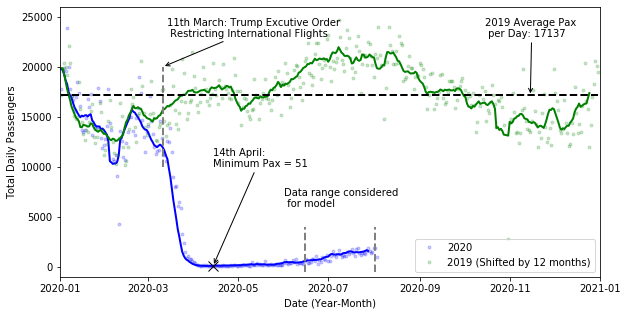

In [16]:
# Plot the figure to compare 2019 and 2020 passenger data, and adding labels to dates and points of interest
fig2 = plt.figure(figsize = [30,15] )
ax2 = fig2.add_axes([0,0, 0.25, 0.25]) # main axes
ax2.plot(Data_2020['Date'], Data_2020['Total'], label = '2020', linestyle = 'none', marker = '.', color = 'b', alpha = 0.2)
ax2.plot(Data_2020['Date'], Data_2020['Total_MovAvg'], linestyle = '-', marker = None, color = 'b', lw = 2)
ax2.plot(Data_2019['Date'], Data_2019['Total'], label = '2019 (Shifted by 12 months)', linestyle = 'none', marker = '.', color = 'g', alpha = 0.2)
ax2.plot(Data_2019['Date'], Data_2019['Total_MovAvg'], linestyle = '-', marker = None, color = 'g', lw = 2)
ax2.plot([Data_2019['Date'].iloc[0],Data_2019['Date'].iloc[-1]], [mean_2019, mean_2019], linestyle = '--', lw = 2, color = 'k')

# Add points of interest
# Trump travel executive order issued
ax2.plot([datetime(2020, 3, 11, 0, 0),datetime(2020, 3, 11, 0, 0)], [10000, 20000], linestyle = '--', lw = 2, color = 'gray')

# Location of minimum passengers 
ax2.plot(datetime(2020, 4, 14, 0, 0), [51], linestyle = 'none', marker = 'x',lw = 3, color = 'k', markersize = 10)

ax2.plot([datetime(2020, 6, 15, 0, 0),datetime(2020, 6, 15, 0, 0)], [-500, 4000], linestyle = '--', lw = 2, color = 'gray')
ax2.plot([datetime(2020, 8, 2, 0, 0),datetime(2020, 8, 2, 0, 0)], [-500, 4000], linestyle = '--', lw = 2, color = 'gray')
ax2.annotate(xy=[datetime(2020, 6, 1, 0, 0),6000], s = 'Data range considered \n for model')

#Add annotations
ax2.annotate(xy=[datetime(2020, 4, 14, 0, 0),100], s = '14th April: \nMinimum Pax = 51', xytext = (datetime(2020,4,14),10000), arrowprops = dict(arrowstyle = '->'))
ax2.annotate(xy=[datetime(2020, 3, 11, 0, 0),20000], s = '11th March: Trump Excutive Order \n Restricting International Flights', xytext = (datetime(2020,3,14),23000), arrowprops = dict(arrowstyle = '->'))
ax2.annotate(xy=[datetime(2020,11, 15, 0, 0),mean_2019], s = ('2019 Average Pax \n per Day: %3i' % mean_2019), xytext = (datetime(2020,10,15),23000), arrowprops = dict(arrowstyle = '->'))
ax2.set(ylim = (-1000,26000))
ax2.set(xlim = (datetime(2020,1,1),datetime(2021,1,1)))
#ax2.set(xticks = np.arange(1,13))
#ax.set(xticklabels = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set(xlabel = 'Date (Year-Month)')
ax2.set(ylabel = 'Total Daily Passengers')
ax2.legend(loc = 4)

plt.show()

The total passenger data is presented in the figure above for 2019 and 2020, with 2019 shifted by 12 months to allow for easier comparison. The data is presented as a moving average of the previous 7 days, to remove weekly oscillations caused by variation in the number of passengers. The raw data is presented as symbols. 

The data shown above shows a stark difference between the total daily passenger numbers processed by CBP of 2019 and those for 2020 to date. COVID-19 and the 11th March Executive Order cause a significant and steep drop in passenger numbers after 1st March. The numbers significantly drop after the executive order (from 12000 to a minimum value of 51). 

However, some recovery can be observed in the last 6 weeks, when restrictions in the Tri-state area began to be lifted. The data between 15th June and 3rd August (the most recent date available) will be used to fit a linear regression model, which will be used to predict the date at which total daily passenger numbers processed by the CBP will return to pre-COVID-19 levels, as decribed by the average passengers processed per day in 2019.

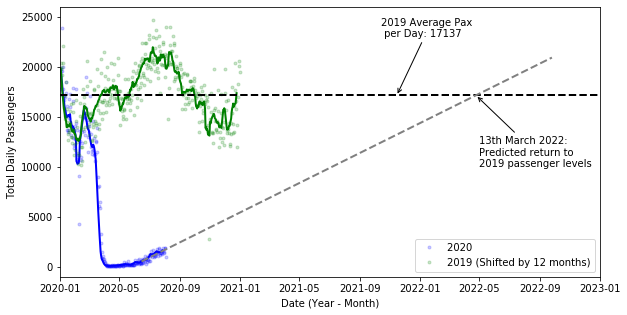

In [17]:
# Plot the linear regression
fig4 = plt.figure(figsize = [30,15] )
ax4 = fig4.add_axes([0,0, 0.25, 0.25]) # main axes
ax4.plot(Data_2020['Date'], Data_2020['Total'], label = '2020 ', linestyle = 'none', marker = '.', color = 'b', alpha = 0.2)
ax4.plot(Data_2020['Date'], Data_2020['Total_MovAvg'], linestyle = '-', marker = None, color = 'b', lw = 2)
ax4.plot(Data_2019['Date'], Data_2019['Total'], label = '2019 (Shifted by 12 months)', linestyle = 'none', marker = '.', color = 'g', alpha = 0.2)
ax4.plot(Data_2019['Date'], Data_2019['Total_MovAvg'], linestyle = '-', marker = None, color = 'g', lw = 2)
ax4.plot([Data_2019['Date'].iloc[0],datetime(2023,1,1)], [mean_2019, mean_2019], linestyle = '--', lw = 2, color = 'k')

# Add Annotations

ax4.annotate(xy=[level_2019[0], level_2019[1]], s = '13th March 2022: \nPredicted return to \n2019 passenger levels', xytext = (datetime(2022,5,1),10000), arrowprops = dict(arrowstyle = '->'))
ax4.annotate(xy=[datetime(2021,11, 15, 0, 0),mean_2019], s = ('2019 Average Pax \n per Day: %3i' % mean_2019), xytext = (datetime(2021,10,15),23000), arrowprops = dict(arrowstyle = '->'))

# Predicted Return to pre-coronavirus levels

ax4.plot(theoretical_fit['Date'], theoretical_fit['Total'], linestyle = '--', marker = None, color = 'gray', lw = 2)

ax4.set(xlabel = 'Date (Year - Month)')
ax4.set(ylabel = 'Total Daily Passengers')
ax4.legend(loc = 4)
ax4.set(ylim = (-1000,26000))
ax4.set(xlim = (datetime(2020,1,1),datetime(2023,1,1)))
plt.show()

The figure above compares the prediction of the linear regression model to the historical data. Using the model to predict forward, we can see that passenger numbers will not recover to pre-COVID-19 level until March 2022, or around 18 months from now. This is in-line with predictions made by IATA, who state that passenger numbers will not recover until at least 2023 or 2024 (SOURCE: https://www.iata.org/en/iata-repository/publications/economic-reports/covid-19-outlook-for-air-travel-in-the-next-5-years/). The caveat must be made that the initial prediction produced during this challenge needs refinement, and should include confidence intervals and inclusion of influencial outside factors, such as the local level of COVID-19 cases. 